# Test andes - trip Gen
```
To debug: there are stability issues.
```

In [88]:
import andes
import os
import pandas as pd
import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
print(f'Pandapower version: {pp.__version__}')

Andes version: 1.6.5.post4.dev0+gae11a531
Pandapower version: 2.8.0


In [89]:
# get andes case from excel
dir_path = os.path.abspath('..')
case_path = '/Test_ieee14_base/ieee14_base.xlsx'
case = dir_path + case_path

ssa = andes.load(case,
                 setup=False,
                 no_output=True,
                 default_config=False)

In [90]:
# Add a Toggler that disconnects `GENROU_2` at t=1 s
ssa.add("Toggler", dict(model='SynGen', dev="GENROU_2", t=1.0))

ssa.setup()

ssa.Toggler.as_df()

,idx,u,name,model,dev,t
uid,,,,,,
0,1,0.0,Toggler_1,Line,Line_1,1.0
1,2,0.0,Toggler_2,Line,Line_1,1.1
2,Toggler_3,1.0,Toggler_3,SynGen,GENROU_2,1.0


In [91]:
ssa.PFlow.run()

# set sim time
ssa.TDS.config.tf = 20

ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggler Toggler_3>: SynGen.GENROU_2 status changed to 0 at t=1.0 sec.


Violated stability criteria.
Simulation terminated at t=3.1334 s.


False

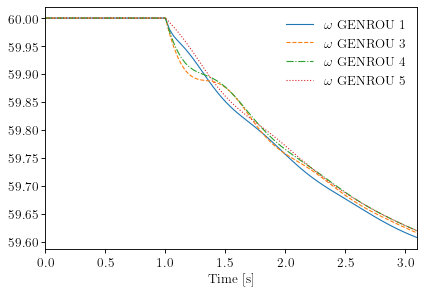

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [92]:
ssa.TDS.load_plotter()

ssa.TDS.plt.plot(ssa.GENROU.omega,
                a=(0, 2, 3, 4),
                ytimes=60,
               )

Singular matrix. Case is not solvable
/Users/buxinshe/Documents/git-repo/andes/andes/routines/eig.py:224: LinAlgWarning: Ill-conditioned matrix (rcond=1.37672e-35): result may not be accurate.
  WT = solve(N, Weye, overwrite_b=True)


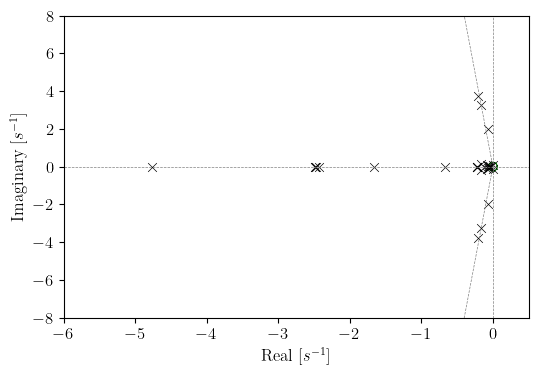

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

In [93]:
ssa.EIG.run()
ssa.EIG.plot()